In [15]:
pip install transformers

In [16]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
image_folder = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/imaget"

In [19]:
import os

image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg'))]
images = [Image.open(file) for file in image_files]

In [39]:
target_image_path = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/imaget/Leo Messi World Cup 2022.jpeg"

In [40]:
target_image = Image.open(target_image_path)

In [41]:
def extract_features(images):
    inputs = processor(images=images, return_tensors="pt", padding=True)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features

target_features = extract_features([target_image])
image_features = extract_features(images)

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(target_features, image_features).flatten()

indices = similarities.argsort()[::-1]

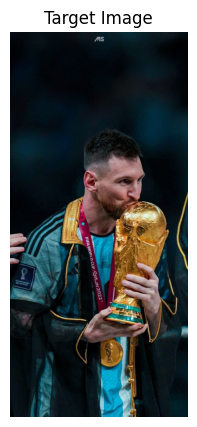

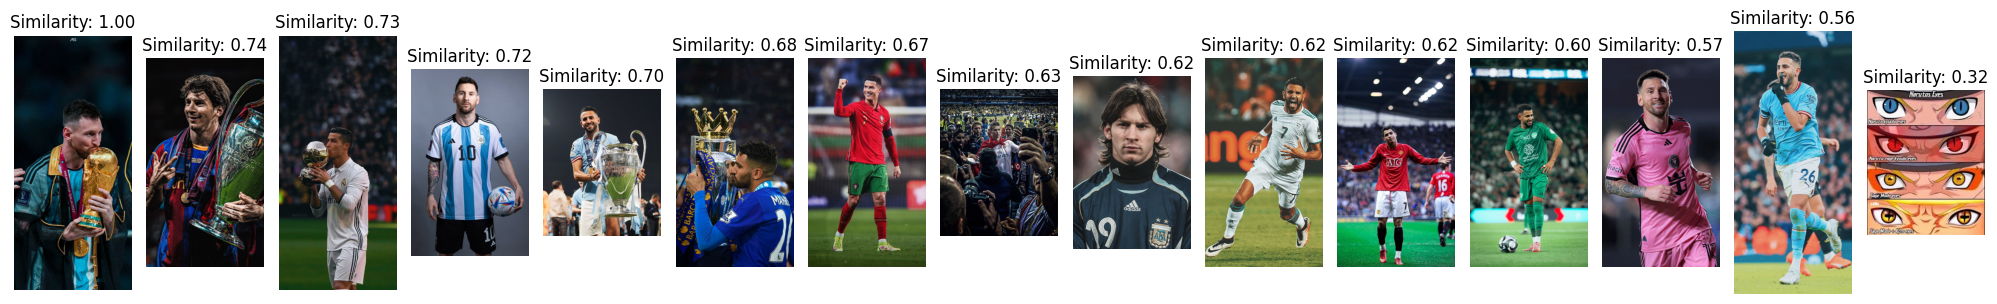

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(target_image)
plt.title("Target Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(20, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[idx])
    plt.title(f"Similarity: {similarities[idx]:.2f}")
    plt.axis("off")
    plt.tight_layout()
plt.show()

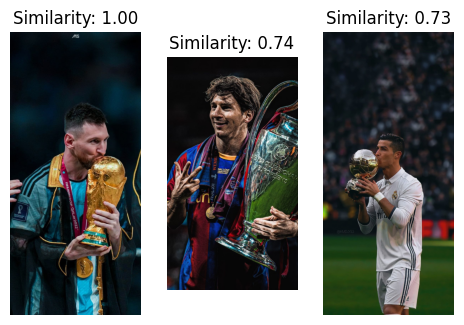

In [48]:
threshold = 0.73

filtered_indices = [i for i, sim in enumerate(similarities) if sim >= threshold]

filtered_indices = sorted(filtered_indices, key=lambda i: similarities[i], reverse=True)


plt.figure(figsize=(30, 5))
for i, idx in enumerate(filtered_indices):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[idx])
    plt.title(f"Similarity: {similarities[idx]:.2f}")
    plt.axis("off")
plt.show()

In [58]:
def get_images(target_image_path, images):
  target_image = Image.open(target_image_path)

  image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg'))]
  images = [Image.open(file) for file in image_files]

  target_features = extract_features([target_image])
  image_features = extract_features(images)

  similarities = cosine_similarity(target_features, image_features).flatten()

  threshold = 0.70

  filtered_indices = [i for i, sim in enumerate(similarities) if sim >= threshold]

  filtered_indices = sorted(filtered_indices, key=lambda i: similarities[i], reverse=True)


  plt.figure(figsize=(15, 5))
  for i, idx in enumerate(filtered_indices):
      plt.subplot(1, len(filtered_indices), i + 1)
      plt.imshow(images[idx])
      plt.title(f"Similarity: {similarities[idx]:.2f}")
      plt.axis("off")
  plt.show()

In [59]:
target_image_path = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/imaget/Mahrez (1).jpeg"
image_folder = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/imaget"

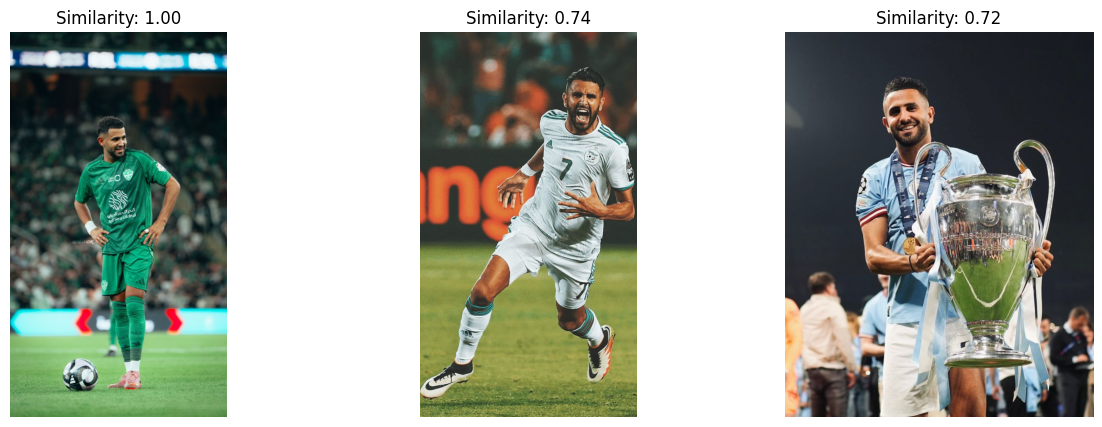

In [60]:
get_images(target_image_path, image_folder)